In [6]:
#Import statements
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
# Print version of each library
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("TensorFlow version:", tf.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)


NumPy version: 1.26.4
Pandas version: 2.2.2
Scikit-learn version: 1.5.2
TensorFlow version: 2.17.1
Matplotlib version: 3.8.0
Seaborn version: 0.13.2


In [7]:
import sys
print("Python version:", sys.version)


Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]


In [ ]:
# Define paths to the saved .npy files
image_data_path = "/content/drive/MyDrive/DFUC_thesis/pseudo_images.npy"  # Replace with your image data file path
labels_path = "/content/drive/MyDrive/DFUC_thesis/pseudo_labels.npy"  # Replace with your labels file path

# Load the NumPy arrays
image_matrix = np.load(image_data_path)
label_array = np.load(labels_path)

# Check the shapes of the loaded arrays
print("Image data shape:", image_matrix.shape)
print("Label array shape:", label_array.shape)

# Define paths to the saved .npy files
image_data_path_val = "/content/drive/MyDrive/DFUC_thesis/image_matrix.npy"  # Replace with your image data file path
labels_path_val = "/content/drive/MyDrive/DFUC_thesis/label_array.npy"  # Replace with your labels file path

# Load the NumPy arrays
image_matrix_val = np.load(image_data_path_val)
label_array_val = np.load(labels_path_val)

# Check the shapes of the loaded arrays
print("Image data shape:", image_matrix_val.shape)
print("Label array shape:", label_array_val.shape)

# Load the saved .npz file
data = np.load('/content/drive/MyDrive/DFUC_thesis/test_images_with_filenames.npz')

# Access the image data and filenames
test_images = data['images']
test_names = data['filenames']

print(f"Loaded {len(test_names)} images")

Image data shape: (7688, 224, 224, 3)
Label array shape: (7688, 4)


In [ ]:


# Create a DataFrame for labels
label_df = pd.DataFrame(label_array, columns=['none', 'infection', 'ischaemia', 'both'])

# Display the DataFrame
print(label_df.head())

import pandas as pd

# Create a DataFrame for labels
label_df_val = pd.DataFrame(label_array_val, columns=['none', 'infection', 'ischaemia', 'both'])

# Display the DataFrame
print(label_df_val.head())

In [ ]:
#Separate labeled and unlabeled data
unlabelled_mask = label_df_val.isna().any(axis=1)  # True for rows with NaN


labelled_df = label_df_val[~unlabelled_mask]  # DataFrame with labelled images
unlabelled_df = label_df_val[unlabelled_mask]  # DataFrame with unlabelled images

X_labelled = image_matrix_val[~unlabelled_mask]
X_unlabelled = image_matrix_val[unlabelled_mask]

# Print out the sizes to verify
print("Number of labelled images:", len(X_labelled))
print("Number of unlabelled images:", len(X_unlabelled))

In [ ]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_labelled, labelled_df, test_size=0.2, random_state=42)

In [ ]:
#Baseline model

# Check class distribution in the original training data (before augmentation)
unique_classes, counts = np.unique(np.argmax(y_train_current, axis=1), return_counts=True)

# Print class distribution before augmentation
print("Class distribution before augmentation:")
class_distribution = dict(zip(unique_classes, counts))
print(class_distribution)

# Load EfficientNetB0 without the top layer (include_top=False)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers if you don't want to train them
base_model.trainable = False

# Create a new model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(
    monitor='val_accuracy',          # Metric to monitor (can be 'accuracy' or 'val_accuracy')
    patience=5,                  # Number of epochs to wait for improvement
    restore_best_weights=True   # Restore the best weights once training stops
)



history = model.fit(X_train_current, y_train_current, batch_size = 128,
                    epochs=50,
                    validation_data=(X_val, y_val), callbacks = [early_stopping])

Class distribution before augmentation:
{0: 3572, 1: 3280, 2: 212, 3: 624}
Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 45s 464ms/step - accuracy: 0.5909 - loss: 0.9350 - val_accuracy: 0.6373 - val_loss: 0.7815
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - accuracy: 0.7227 - loss: 0.6998 - val_accuracy: 0.6793 - val_loss: 0.7331
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.7396 - loss: 0.6407 - val_accuracy: 0.7028 - val_loss: 0.6928
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - accuracy: 0.7805 - loss: 0.6026 - val_accuracy: 0.7011 - val_loss: 0.6755
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - accuracy: 0.8028 - loss: 0.5498 - val_accuracy: 0.7313 - val_loss: 0.6496
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - accuracy: 0.7996 - loss: 0.5473 - val_accuracy: 0.7330 - val_loss: 0.6382
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - accuracy: 0.8158 - loss: 0.5173 - val_accuracy: 0.7380 - val_loss: 0.6120
Epoch 8/50
61/61 ━━━━━━━━━━━

In [ ]:
#Undersampling

# Define target number of samples per class
target_samples = 175

# Prepare lists to collect the downsampled data
X_train_balanced = []
y_train_balanced = []
# Class columns in y_train corresponding to the one-hot encoding
class_columns = ["none", "infection", "ischaemia", "both"]

for cls in class_columns:
    # Filter y_train to get indices for the current class
    class_indices = combined_y_train[combined_y_train[cls] == 1].index

    # Downsample if there are more samples than needed
    if len(class_indices) > target_samples:
        sampled_indices = np.random.choice(class_indices, target_samples, replace=False)
    else:
        sampled_indices = class_indices  # Use all samples if <= target_samples

    # Append the selected samples to the balanced dataset
    X_train_balanced.append(combined_X_train[sampled_indices])
    y_train_balanced.append(combined_y_train.loc[sampled_indices])

# Concatenate all downsampled data
X_train_balanced = np.concatenate(X_train_balanced, axis=0)
y_train_balanced = pd.concat(y_train_balanced, axis=0)

# Verify the new shapes
print("Balanced X_train shape:", X_train_balanced.shape)


In [ ]:
#Iterative self-learning

confidence_threshold = 0.9

# Start with the original training data
X_train_current = X_train
y_train_current = y_train

# Keep track of indices for pseudo-labeled data
pseudo_labeled_indices = set()

# Define number of iterations for self-learning
num_iterations = 10

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)
# Define your data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=30,             # Randomly rotate images by up to 30 degrees
    width_shift_range=0.30,        # Randomly shift images horizontally by 30%
    height_shift_range=0.30,       # Randomly shift images vertically by 30%
    shear_range=0.30,              # Apply shear transformation
    zoom_range=0.30,               # Randomly zoom images by up to 30%
    horizontal_flip=True,          # Randomly flip images horizontally
    fill_mode='nearest',           # Fill empty pixels using the nearest valid pixels
    brightness_range=[0.75, 1.25], # Randomly adjust brightness
    channel_shift_range=70,        # Randomly shift color channels by up to 70
)

for iteration in range(num_iterations):
    print(f"--- Iteration {iteration + 1} ---")
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

        # Reset EarlyStopping for this iteration
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

        # Apply augmentations to the original labeled data
    train_generator = datagen.flow(X_train_current, y_train_current, batch_size=128)

    # Train the model on augmented labeled data
    model.fit(train_generator, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

    # Step 2: Generate pseudo-labels for the unlabeled data
    # Apply augmentation to the unlabeled data before generating pseudo-labels
    augmented_unlabeled_generator = datagen.flow(X_unlabelled, batch_size=128, shuffle=False)
    pseudo_labels = model.predict(augmented_unlabeled_generator)

    # Step 3: Filter pseudo-labels with confidence > 0.9
    pseudo_label_class_indices = np.argmax(pseudo_labels, axis=1)  # Convert one-hot to class indices
    max_confidence = np.max(pseudo_labels, axis=1)  # Get max confidence for each sample

    # Keep pseudo-labels with confidence > 0.9
    confident_samples = max_confidence > confidence_threshold

    # Get the indices of the confident pseudo-labeled samples
    confident_indices = np.where(confident_samples)[0]

    # Exclude indices that were already pseudo-labeled in previous iterations
    new_indices = [i for i in confident_indices if i not in pseudo_labeled_indices]

    # If no new pseudo-labeled samples were found, break the loop
    if len(new_indices) == 0:
        print("No new confident samples found. Stopping self-learning.")
        break

    # Get the confident pseudo-labels and their corresponding images that are new
    X_pseudo_labeled = X_unlabelled[new_indices]
    y_pseudo_labeled = pseudo_labels[new_indices]

    # Step 4: Combine the current labeled data with the high-confidence pseudo-labeled data
    X_train_current = np.concatenate([X_train_current, X_pseudo_labeled], axis=0)
    y_train_current = np.concatenate([y_train_current, y_pseudo_labeled], axis=0)

    # Update the set of pseudo-labeled indices with the new pseudo-labels
    pseudo_labeled_indices.update(new_indices)

    # Step 5: Print class distribution of the current training set (including pseudo-labels)
    unique_classes_current, counts_current = np.unique(np.argmax(y_train_current, axis=1), return_counts=True)
    class_distribution_current = dict(zip(unique_classes_current, counts_current))
    print("Current class distribution after pseudo-labelling:")
    print(class_distribution_current)

    # Optionally, you can also print the class distribution of just the pseudo-labeled samples
    unique_classes_pseudo, counts_pseudo = np.unique(np.argmax(y_pseudo_labeled, axis=1), return_counts=True)
    pseudo_class_distribution = dict(zip(unique_classes_pseudo, counts_pseudo))
    print("Class distribution in pseudo-labeled data:")
    print(pseudo_class_distribution)

    print(f"Added {len(X_pseudo_labeled)} new pseudo-labeled samples this iteration.")


--- Iteration 1 ---
Epoch 1/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 609ms/step - accuracy: 0.4392 - loss: 1.1256 - val_accuracy: 0.6247 - val_loss: 0.8265
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - accuracy: 0.6187 - loss: 0.8409 - val_accuracy: 0.6574 - val_loss: 0.7434
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - accuracy: 0.6631 - loss: 0.7659 - val_accuracy: 0.6902 - val_loss: 0.7032
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - accuracy: 0.6795 - loss: 0.7230 - val_accuracy: 0.7053 - val_loss: 0.6838
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy: 0.7063 - loss: 0.6875 - val_accuracy: 0.7003 - val_loss: 0.6602
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - accuracy: 0.7168 - loss: 0.6426 - val_accuracy: 0.6994 - val_loss: 0.6608
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy: 0.7170 - loss: 0.6504 - val_accuracy: 0.7305 - val_loss: 0.6205
Epoch 8/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - accuracy: 0.7546 - loss: 0.59

In [ ]:
#Generating pseudo-labels from baseline model
pseudo_labels = model.predict(X_unlabelled)

125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step


In [ ]:
confidence_threshold = 0.50
pseudo_labels_confident = pseudo_labels.max(axis=1) > confidence_threshold
pseudo_labels_final = pseudo_labels[pseudo_labels_confident]
X_pseudo_labeled = X_unlabelled[pseudo_labels_confident]

In [ ]:
pseudo_label_class_indices = np.argmax(pseudo_labels_final, axis=1)
unique_classes_pseudo, counts_pseudo = np.unique(pseudo_label_class_indices, return_counts=True)

# Print the class distribution of the pseudo-labeled data
print("Class distribution in pseudo-labeled data:")
pseudo_class_distribution = dict(zip(unique_classes_pseudo, counts_pseudo))
print(pseudo_class_distribution)


Class distribution in pseudo-labeled data:
{0: 2336, 1: 1390, 2: 21, 3: 134}


In [ ]:
print(len(X_pseudo_labeled))
# Step 3: Combine original labeled data with pseudo-labeled data
X_combined = np.concatenate([X_train, X_pseudo_labeled], axis=0)
y_combined = np.concatenate([y_train, pseudo_labels_final], axis=0)
len(X_combined)

3881


8645

In [ ]:
#On the fly data augmentation
# Check class distribution in the original training data (before augmentation)
unique_classes, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)

print("Class distribution before augmentation:")
class_distribution = dict(zip(unique_classes, counts))
print(class_distribution)

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])


model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(
    rotation_range=20,             # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,         # Randomly shift images horizontally by 20%
    height_shift_range=0.2,        # Randomly shift images vertically by 20%
    shear_range=0.2,               # Apply shear transformation
    zoom_range=0.2,                # Randomly zoom images by up to 20%
    horizontal_flip=True,          # Randomly flip images horizontally
    fill_mode='nearest',           # Fill empty pixels using the nearest valid pixels
    brightness_range=[0.8, 1.2],   # Randomly adjust brightness
    channel_shift_range=50,        # Randomly shift color channels by up to 50
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)
train_generator = datagen.flow(X_train, y_train, batch_size=128)


history = model.fit(train_generator,
                    epochs=50,
                    validation_data=(X_val, y_val), callbacks = [early_stopping])


Class distribution before augmentation:
{0: 2044, 1: 2049, 2: 175, 3: 496}
Class distribution after augmentation:
{0: 5407, 1: 5413, 2: 467, 3: 1313}
Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.4985 - loss: 1.0735 - val_accuracy: 0.6188 - val_loss: 0.8492
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.6002 - loss: 0.8677 - val_accuracy: 0.6306 - val_loss: 0.7979
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.6202 - loss: 0.8269 - val_accuracy: 0.6306 - val_loss: 0.7958
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.6296 - loss: 0.8009 - val_accuracy: 0.6658 - val_loss: 0.7446
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.6597 - loss: 0.7726 - val_accuracy: 0.6625 - val_loss: 0.7449
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.6579 - loss: 0.7740 - val_accuracy: 0.6809 - val_loss: 0.7298
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.6696 - loss: 0.7360 - val_accuracy: 0.6935 - val_loss: 0.7169
Epoch 8/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.6672 - loss: 0.7351 - val_accuracy: 0.6986 - val_loss: 0.6994
Epo

In [ ]:
#Teacher model
# Teacher model definition
base_model_teacher = EfficientNetB0(include_top=False, input_shape=(224, 224, 3))
# Freeze the base model layers if you don't want to train them
base_model_teacher.trainable = False

teacher_model = Sequential([
    base_model_teacher,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # Adjust num_classes
])

# Compile the teacher model
teacher_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train on the labeled data
teacher_history = teacher_model.fit(X_train, y_train, batch_size=64, epochs=25, validation_data=(X_val, y_val))


In [ ]:
#Performance metrics
class_names = y_val.columns.tolist()

# Make predictions on the validation set
y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)

y_true = np.argmax(y_val.values, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate F1 score and other classification metrics using the class names
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)


38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step
Accuracy: 0.8094
              precision    recall  f1-score   support

        none       0.77      0.85      0.81       508
   infection       0.81      0.76      0.78       506
   ischaemia       0.97      0.73      0.84        52
        both       0.92      0.87      0.89       125

    accuracy                           0.81      1191
   macro avg       0.87      0.80      0.83      1191
weighted avg       0.81      0.81      0.81      1191



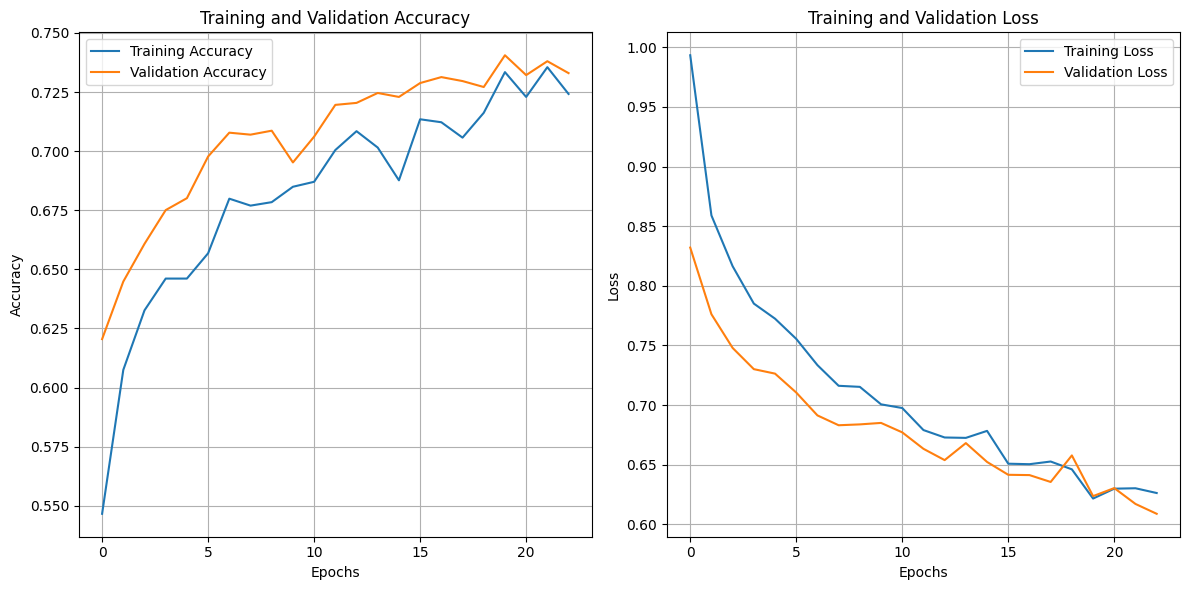

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#Creating example images and augmentations

# Extract the indices where the 'ischaemia' column has value 1
class_0_indices = y_train['none'] == 1
class_1_indices = y_train['infection'] == 1
class_2_indices = y_train['ischaemia'] == 1
class_3_indices = y_train['both'] == 1

# Extract the images corresponding to class 2 (ischaemia)
class_0_images = X_train[class_0_indices]
class_1_images = X_train[class_1_indices]

class_2_images = X_train[class_2_indices]
class_3_images = X_train[class_3_indices]


from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

class_0_image = class_0_images[1]  # Take one image from class 0
class_1_image = class_1_images[2]  # Take one image from class 1
class_2_image = class_2_images[2]  # Take one image from class 2
class_3_image = class_3_images[1]  # Take one image from class 3

# Create an ImageDataGenerator with augmentations
datagen = ImageDataGenerator(
    rotation_range=30,             # Randomly rotate images by up to 30 degrees
    width_shift_range=0.3,         # Randomly shift images horizontally by 30%
    height_shift_range=0.3,        # Randomly shift images vertically by 30%
    shear_range=0.3,               # Apply shear transformation
    zoom_range=0.3,                # Randomly zoom images by up to 30%
    horizontal_flip=True,          # Randomly flip images horizontally
    fill_mode='nearest',           # Fill empty pixels using the nearest valid pixels
    brightness_range=[0.75, 1.25], # Randomly adjust brightness
    channel_shift_range=70         # Randomly shift color channels by up to 70
)

num_augmented_images = 1

augmented_images_list = []

classes = [class_0_image, class_1_image, class_2_image, class_3_image]
class_names = ['None', 'Infection', 'Ischaemia', 'Both']

# Loop through each class and generate augmented images
for i, class_image in enumerate(classes):

    class_image_resized = np.expand_dims(class_image, axis=0)
    datagen.fit(class_image_resized)

    augmented_images = datagen.flow(class_image_resized, batch_size=1, save_to_dir=None)

    augmented_images_list_class = []
    for _ in range(num_augmented_images):
        augmented_image = next(augmented_images)[0].astype(np.uint8)
        augmented_images_list_class.append(augmented_image)

    augmented_images_list.append((class_image, np.array(augmented_images_list_class)[0]))

# Plot original and augmented images for each class
fig, axes = plt.subplots(2, len(classes), figsize=(len(classes) * 6, 12))

# Plot the original and augmented images for each class
for i, (original_image, augmented_image) in enumerate(augmented_images_list):
    axes[0, i].imshow(original_image)
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Original {class_names[i]}')

    axes[1, i].imshow(augmented_image)
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Augmented {class_names[i]}')

plt.tight_layout()
plt.show()


In [ ]:
#Plotting and summarizing all model results
models = [
    "Baseline", "Pseudo 0.50", "Pseudo 0.70", "Pseudo 0.90", "Pseudo 0.90 + Aug.",
    "Aug. Pseudo 0.50 + Aug", "Weak Augment", "Balanced Augment", "Strong Augment", "Stronger Augment",
    "Undersampling", "Targeted oversampling", "Uniform oversampling", "Iterative self-learning", "Noisy Student Training"
]

macro_f1_scores = [
    0.5349, 0.5170, 0.5475, 0.5489, 0.5917,
    0.5934, 0.58007, 0.56659, 0.61142, 0.56586,
    0.46394, 0.53532, 0.56694, 0.5978, 0.55
]

data = {
    'Model': models,
    'Macro F1-Score': macro_f1_scores
}

df = pd.DataFrame(data)

# Sort the DataFrame by 'Macro F1-Score'
df = df.sort_values(by='Macro F1-Score', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Macro F1-Score', data=df, palette='coolwarm')

plt.title('Macro F1-Scores for Analyzed Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Macro F1-Score', fontsize=12)

plt.ylim(0.45, 0.65)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

# Display the plot
plt.tight_layout()
plt.show()
